<a href="https://colab.research.google.com/github/julio-7370/Python-Tensor-Flow-Transfer-Learning/blob/main/Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importando bibliotecas

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [7]:
# baixar a base de dados

import tensorflow_datasets as tfds

# Carregar dataset de gatos e cães
(ds_train, ds_val), ds_info = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:]'],
    with_info=True,
    as_supervised=True,
)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.N3BS06_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


In [8]:
# pre-processamento das imagens

IMG_SIZE = 160  # tamanho padrão para MobileNetV2

def preprocess(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = image / 255.0  # normalização
    return image, label

train = ds_train.map(preprocess).batch(32).shuffle(1000)
val = ds_val.map(preprocess).batch(32)


In [9]:
# carregar modelo pré-treinado (MobileNetV2)

base_model = tf.keras.applications.MobileNetV2(
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False,
    weights='imagenet'
)

base_model.trainable = False  # Congelar pesos da base


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [10]:
# construir a rede final

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1, activation='sigmoid')  # saída binária: cão ou gato
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [11]:
# treinar o modelo

history = model.fit(
    train,
    validation_data=val,
    epochs=5
)


Epoch 1/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 512s 826ms/step - accuracy: 0.7951 - loss: 0.4512 - val_accuracy: 0.9592 - val_loss: 0.1371
Epoch 2/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 523s 761ms/step - accuracy: 0.9613 - loss: 0.1247 - val_accuracy: 0.9686 - val_loss: 0.0967
Epoch 3/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 476s 774ms/step - accuracy: 0.9681 - loss: 0.0952 - val_accuracy: 0.9714 - val_loss: 0.0822
Epoch 4/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 478s 778ms/step - accuracy: 0.9700 - loss: 0.0822 - val_accuracy: 0.9748 - val_loss: 0.0745
Epoch 5/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 473s 769ms/step - accuracy: 0.9729 - loss: 0.0764 - val_accuracy: 0.9766 - val_loss: 0.0694


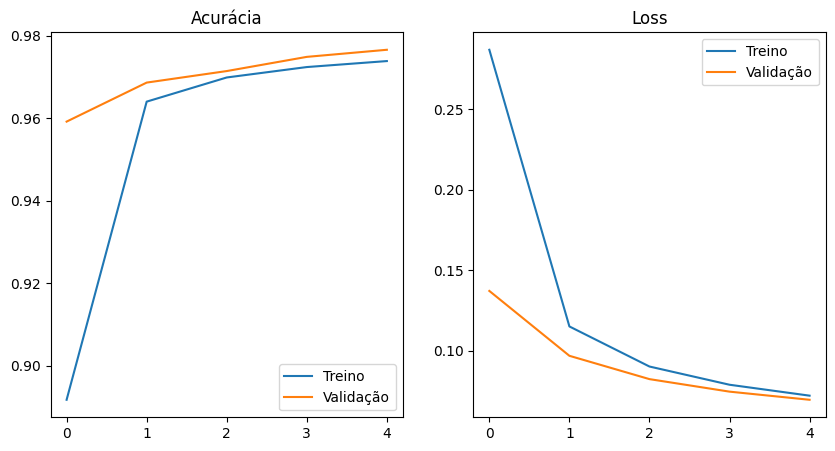

In [12]:
# avaliar resultados

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(acc, label='Treino')
plt.plot(val_acc, label='Validação')
plt.legend()
plt.title('Acurácia')

plt.subplot(1,2,2)
plt.plot(loss, label='Treino')
plt.plot(val_loss, label='Validação')
plt.legend()
plt.title('Loss')
plt.show()
